Objective: The goal of the project is to predict customer churn using data from Kaggle. Churn prediction allows the business to proactively retain customers who are likely to leave.

Why It Matters: Highlight the impact of churn on revenue, customer lifetime value, and retention costs.

Feature Selection: Prioritizing the top three predictive features: Tenure, Complain, and DaysSinceLastOrder, which together accounted for over 80% of model importance.

Model Choice: Opted for a decision tree model due to its interpretability and ability to handle non-linear relationships effectively.

Retention Strategies: Target customers with lower tenure, recent complaints, or high inactivity (DaysSinceLastOrder) for engagement efforts such as personalized offers or customer service outreach.

Operational Focus: Improving satisfaction scores or addressing complaints quickly may further reduce churn risk.

Model Limitations: The model performs well overall but has lower recall for churners. As a result, some customers at risk of churning may not be flagged.

Recommendations: Recommend focusing retention efforts on customers flagged by the model, prioritizing those with high churn probabilities.

Import necessary packages and data

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:/JPEM_Git_Main/JPEM/JPEM_SAIT/Winter2025_PROJ406/Team 7/data/ECommerce.csv")

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


Data Preparation

In [53]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Drop unnecessary columns (if any) and handle missing values
df = df.drop(columns=['CustomerID'])

# Adjust according to your dataset's structure
df = df.dropna()  # Remove rows with missing values

# Encode categorical variables
# Convert object columns to category type if necessary
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category').cat.codes


Missing Values:
CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


EDA

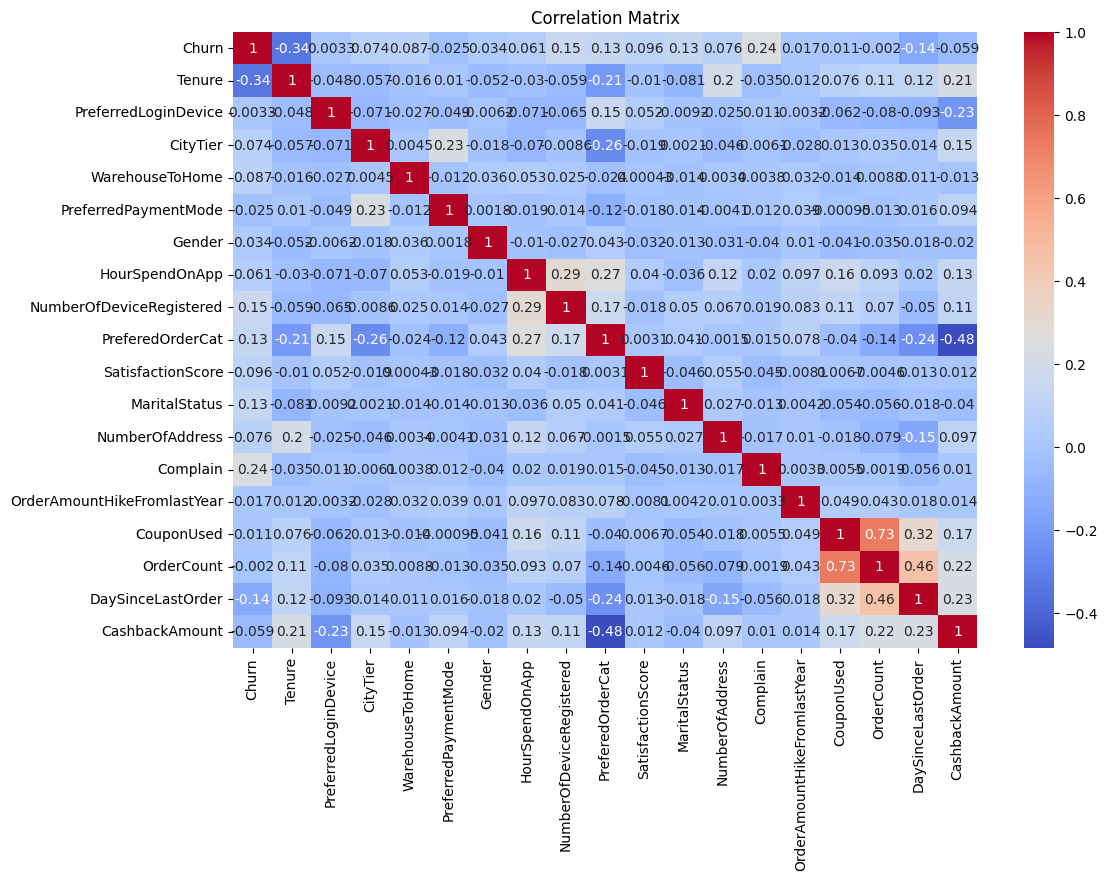

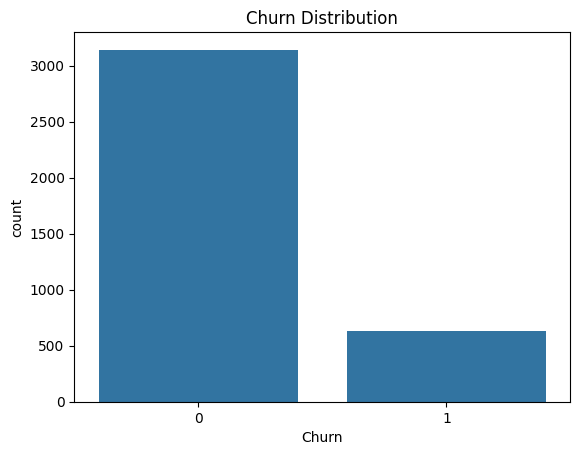

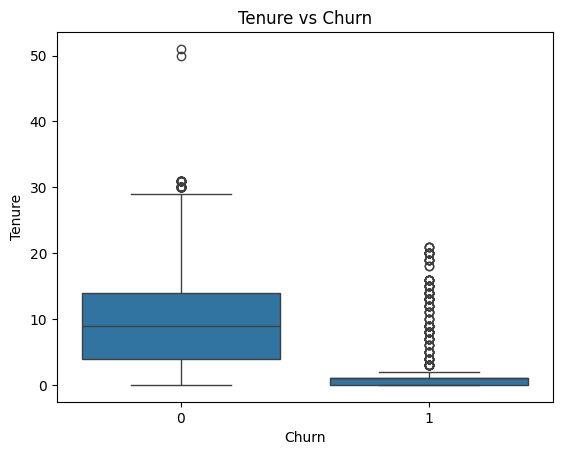

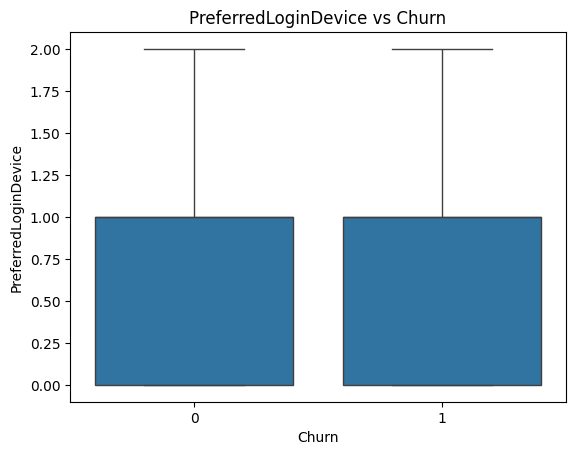

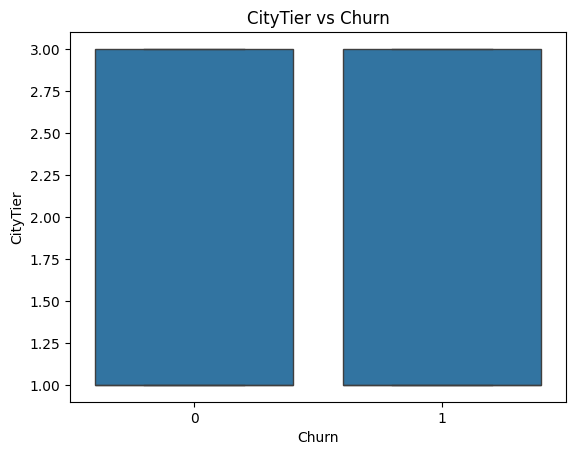

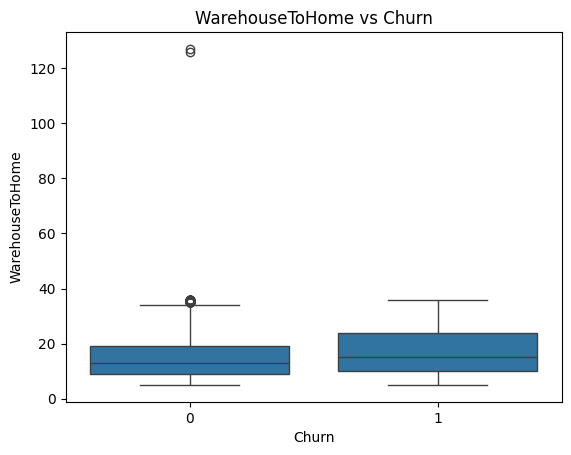

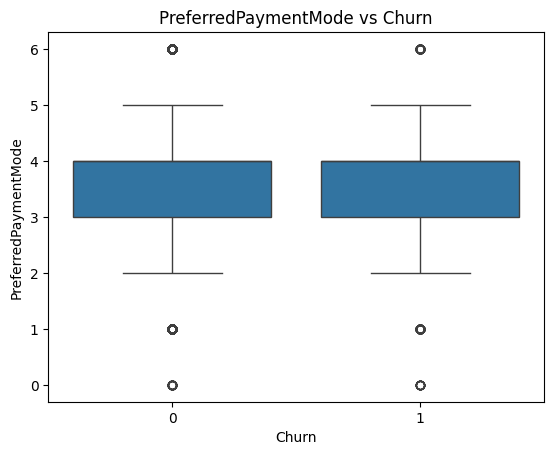

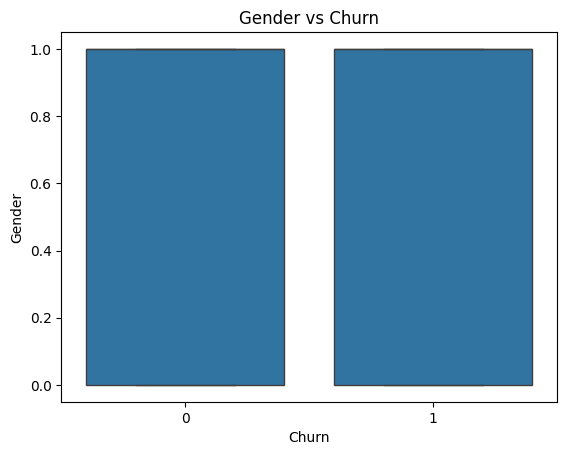

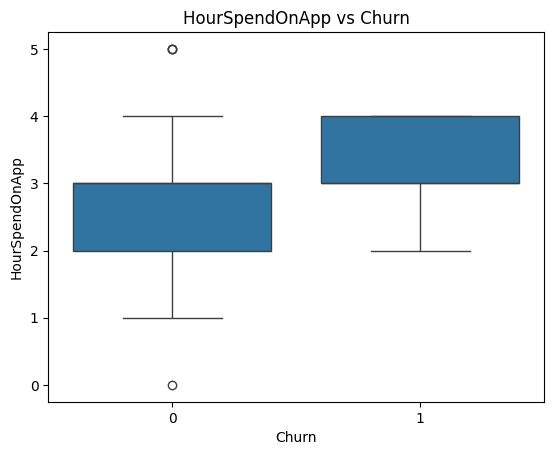

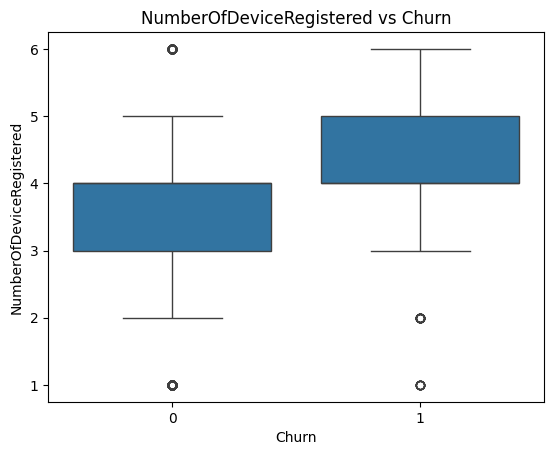

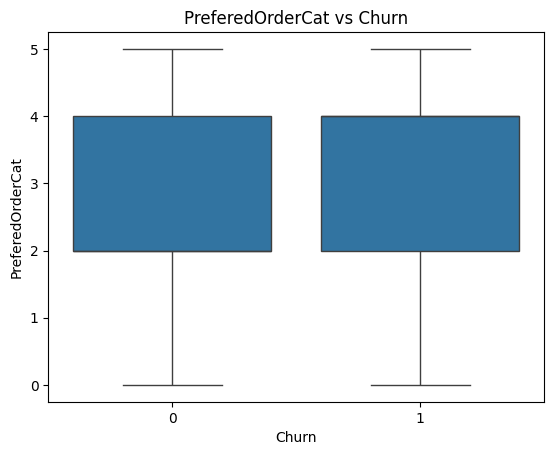

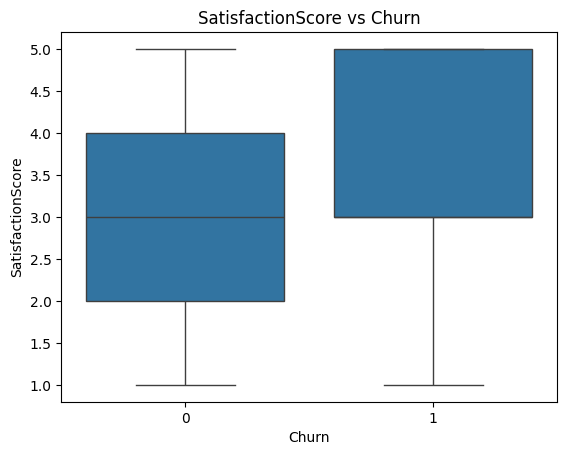

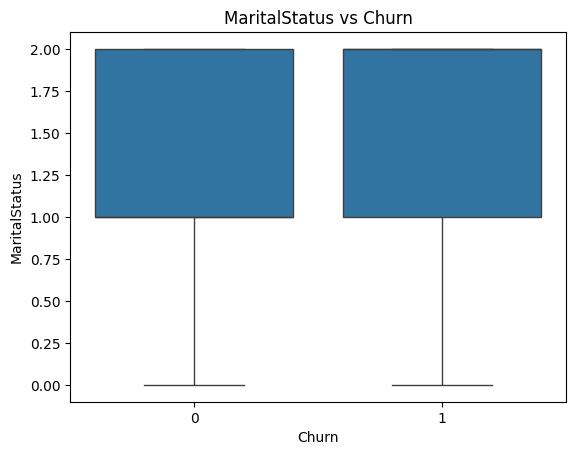

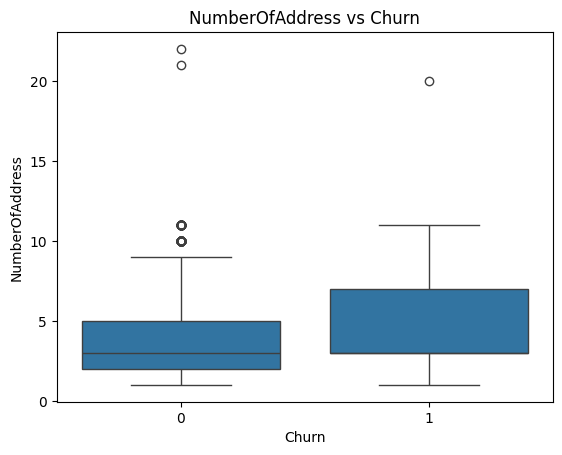

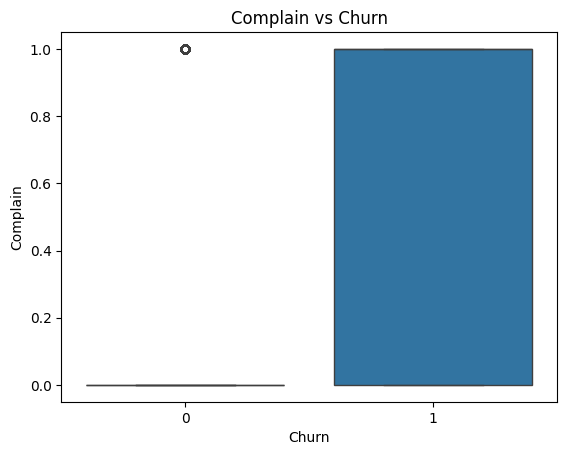

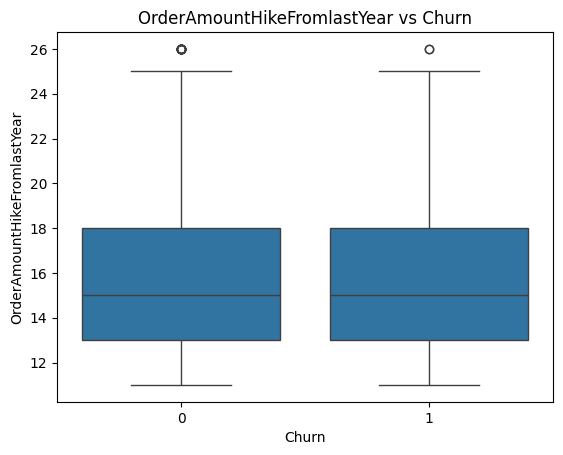

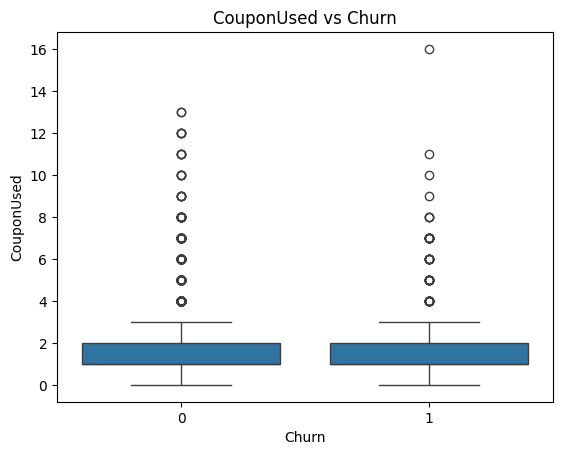

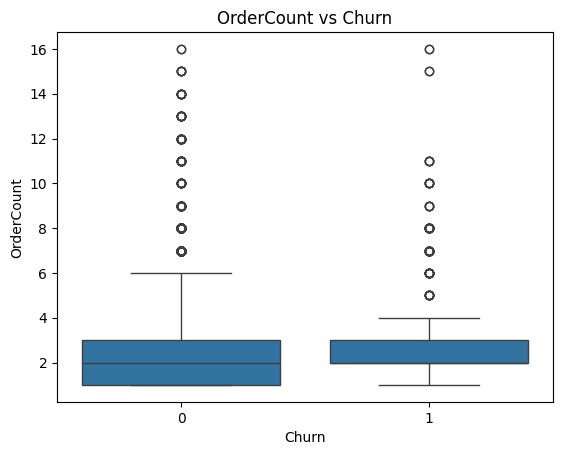

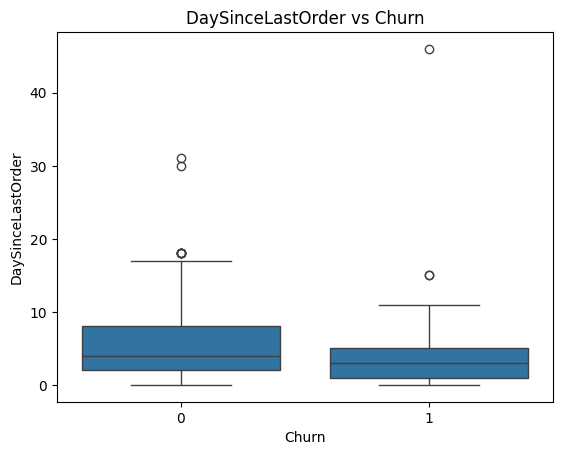

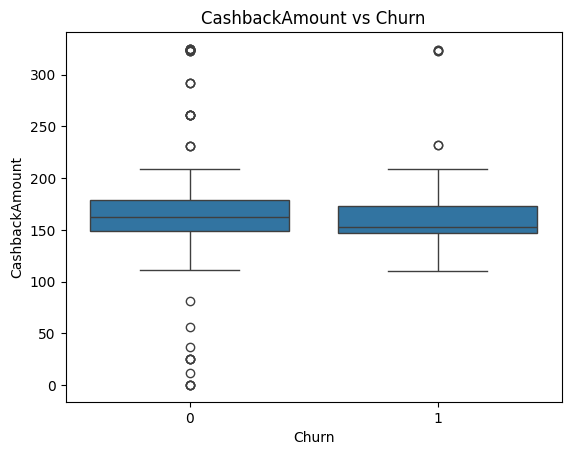

In [54]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Visualize churn distribution
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

# Feature analysis: visualize relationships between features and churn
for col in df.columns:
    if col != 'Churn':
        plt.figure()
        sns.boxplot(x='Churn', y=col, data=df)
        plt.title(f"{col} vs Churn")
        plt.show()

Looking at the distribution of data for customers who churn versus those who don't - the most significant differences occur with those customers who 
have short tenure, followed by those customers who complain. Using these relationships will allow us to fine tune our model by focusing on those
variables that have the greatest impact.

Logistic Regression Model

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# Split dataset into features (X) and target (y)
X = df.drop(columns=['Churn'])  # 'Churn' is your target variable
y = df['Churn']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8927152317880794

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       648
           1       0.69      0.44      0.54       107

    accuracy                           0.89       755
   macro avg       0.80      0.70      0.74       755
weighted avg       0.88      0.89      0.88       755



c:\Users\jason\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Model result shows a high degree of model accuracy, however the model performs better when predicting which customers will stay (not churn) than it 
does predicting which customers will leave (churn). Next we will try a decision tree model to see if we can improve performance over Logistic Regression.

Train Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay

# Train decision tree
tree_model = DecisionTreeClassifier(max_depth= 3, random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
y_tree_pred = tree_model.predict(X_test)

# Evaluate accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test, y_tree_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_tree_pred))

Decision Tree Accuracy: 0.8887417218543047

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       648
           1       0.65      0.47      0.54       107

    accuracy                           0.89       755
   macro avg       0.78      0.71      0.74       755
weighted avg       0.88      0.89      0.88       755



The Decision Tree model performs much better than the Logistic Regression. Model accuracy is higher, and the Decision Tree does a much better job predicting both customers
who churn and those who do not.

Optimize Decision Tree

In [57]:
tree_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
tree_model.fit(X_train, y_train)

y_tree_pred = tree_model.predict(X_test)
print("Optimized Decision Tree Accuracy:", accuracy_score(y_test, y_tree_pred))

Optimized Decision Tree Accuracy: 0.904635761589404


Visualize Feature Importance


Feature Importance:
                        Feature  Importance
0                        Tenure    0.550366
12                     Complain    0.126362
16            DaySinceLastOrder    0.122113
11              NumberOfAddress    0.081671
3               WarehouseToHome    0.023455
9             SatisfactionScore    0.022143
13  OrderAmountHikeFromlastYear    0.020151
7      NumberOfDeviceRegistered    0.017442
17               CashbackAmount    0.016904
2                      CityTier    0.012096
4          PreferredPaymentMode    0.005859
15                   OrderCount    0.001437
1          PreferredLoginDevice    0.000000
5                        Gender    0.000000
8              PreferedOrderCat    0.000000
6                HourSpendOnApp    0.000000
10                MaritalStatus    0.000000
14                   CouponUsed    0.000000


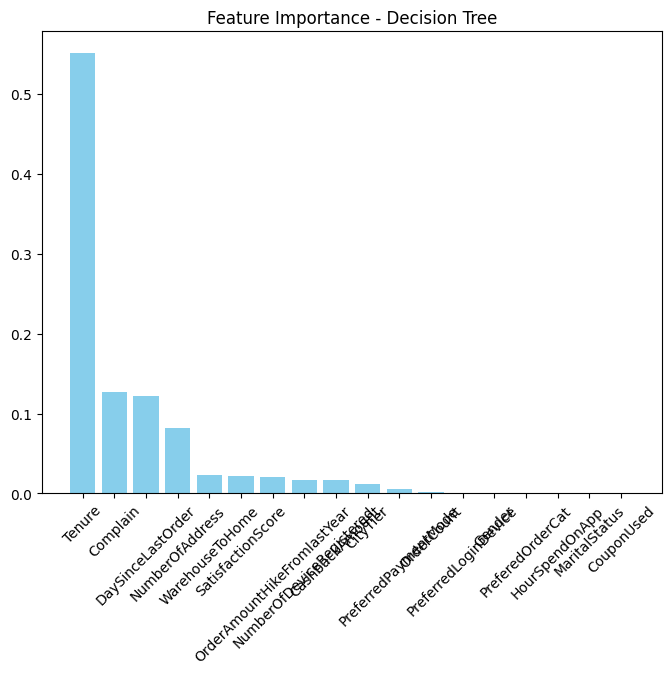

In [58]:
# Get feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance)

# Visualize feature importance
plt.figure(figsize=(8, 6))
plt.bar(importance['Feature'], importance['Importance'], color='skyblue')
plt.xticks(rotation=45)
plt.title("Feature Importance - Decision Tree")
plt.show()

Examining Model Results

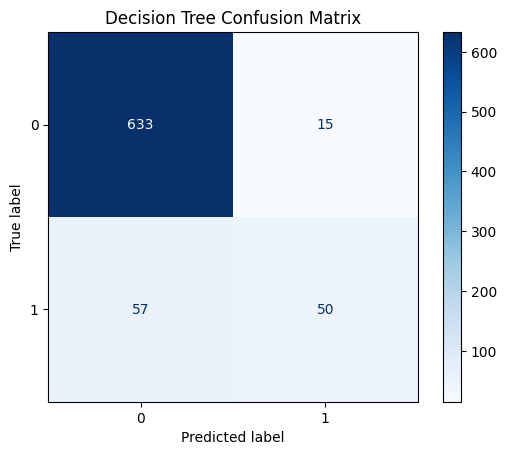

In [59]:
ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test, cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

1. True Positives (Top-Right Quadrant for Class 1):
    A customer churned and the model predicted they would

2. True Negatives (Top-Left Quadrant for Class 0):
    A customer did not churn and the model predicted they would not

3. False Positives (Bottom-Right Quadrant for Class 0):
    Model predicted churn, but custoemr remained loyal

4. False Negatives (Bottom-Left Quadrant for Class 1):
    A customer churned but the model predicted they stayed

Now that we have identified the top three causes of customer churn, we should re-run the model
Tenure, Complain, and DaysSinceLastOrder

In [60]:
X = df[['Tenure', 'Complain', 'DaySinceLastOrder']]  # Select top features
y = df['Churn']  # Target variable

Retrain the New Model

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree
tree_model = DecisionTreeClassifier(max_depth=3, max_features=3, random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
y_tree_pred = tree_model.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_tree_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_tree_pred))

Decision Tree Accuracy: 0.8874172185430463

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       648
           1       0.63      0.49      0.55       107

    accuracy                           0.89       755
   macro avg       0.78      0.72      0.74       755
weighted avg       0.88      0.89      0.88       755



Evaluate Feature Contribution


Feature Importance:
             Feature  Importance
0             Tenure    0.756753
1           Complain    0.170758
2  DaySinceLastOrder    0.072489


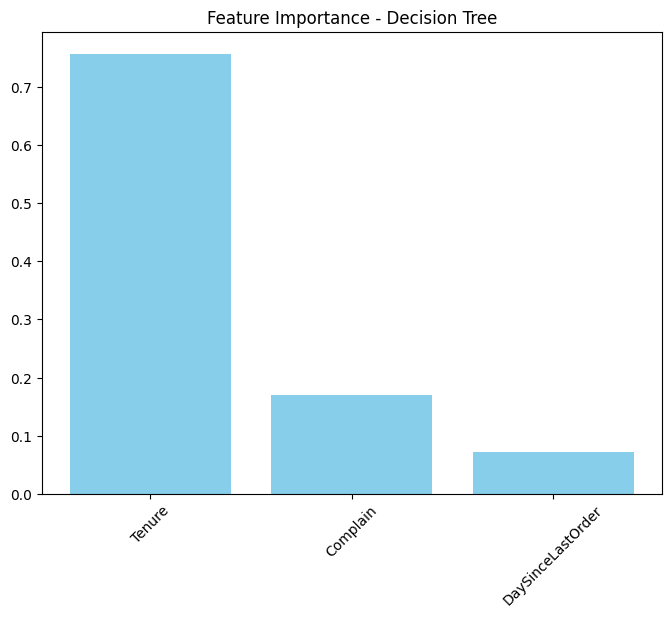

In [62]:
# Feature Importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance)

# Visualize feature importance
plt.figure(figsize=(8, 6))
plt.bar(importance['Feature'], importance['Importance'], color='skyblue')
plt.xticks(rotation=45)
plt.title("Feature Importance - Decision Tree")
plt.show()

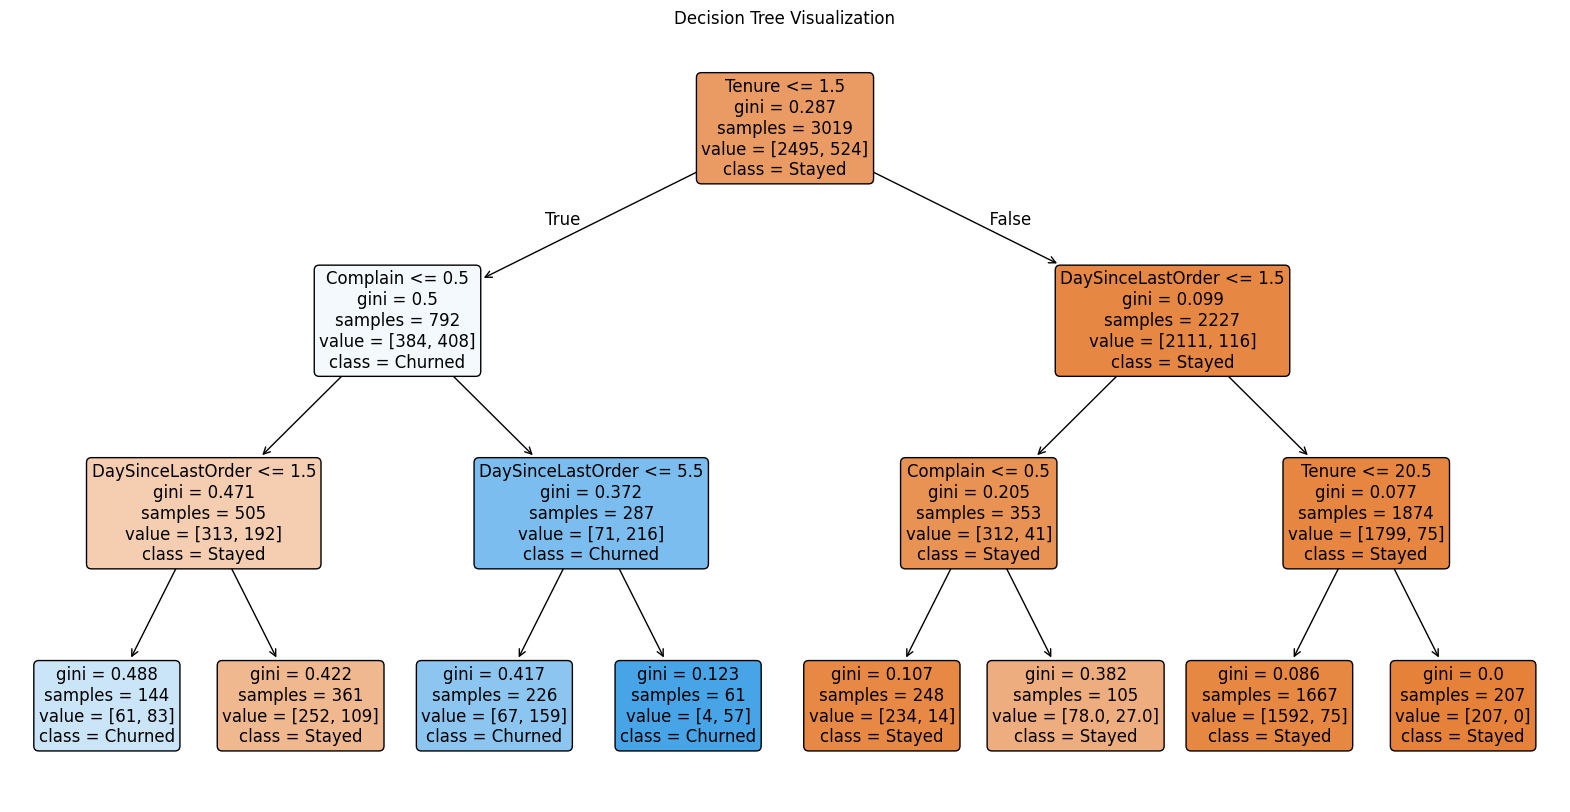

In [63]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))  # Adjust the size for better readability
plot_tree(tree_model, 
          feature_names=['Tenure', 'Complain', 'DaySinceLastOrder'],  # Replace with your feature names
          class_names=['Stayed', 'Churned'],  # Replace with your target class labels
          filled=True,  # Add color to nodes based on class
          rounded=True,  # Rounded corners for aesthetics
          fontsize=12)  # Adjust font size for clarity
plt.title("Decision Tree Visualization")
plt.show()

Tenure dominates the root node:
- Customers with very short tenure (Tenure <= 1.5>) are more likely to churn. 

Complaints Impact Churn:
- For customers with low tenure, the next split checks if they’ve submitted complaints (Complain <= 0.5). Complaining customers are more likely to churn.

Recent Inactivity Predicts Churn:
- The model evaluates , suggesting that customers with longer inactivity periods have higher churn probabilities.

Export results for Power BI Visualization

In [64]:
# Preprocessing steps: loading dataset, cleaning, feature engineering, etc.
df = pd.read_csv("C:/JPEM_Git_Main/JPEM/JPEM_SAIT/Winter2025_PROJ406/Team 7/data/ECommerce.csv")
df = df.dropna()  # Example: dropping rows with missing values

# Additional preprocessing...
df['ChurnProbability'] = tree_model.predict_proba(X)[:, 1]
df['RiskLevel'] = pd.cut(df['ChurnProbability'], bins=[0, 0.33, 0.66, 1], labels=['Low', 'Medium', 'High'])

# Reintegrate CustomerID
original_df = pd.read_csv("C:/JPEM_Git_Main/JPEM/JPEM_SAIT/Winter2025_PROJ406/Team 7/data/ECommerce.csv")  # Load original dataset
df['CustomerID'] = original_df.loc[df.index, 'CustomerID']  # Match CustomerID based on index

# Save the updated dataset to a new CSV file
df.to_csv("C:/JPEM_Git_Main/JPEM/JPEM_SAIT/Winter2025_PROJ406/Team 7/data/Preprocessed_ECommerce.csv", index=False)